<a href="https://colab.research.google.com/github/medbme/colab/blob/master/lung_nodule_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 이미지 파일 및 기타 파일 GitHub에서 가져오는 코드
!git clone https://github.com/medbme/colab.git


In [0]:
  
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
# 이미지 불러오기
img = cv2.imread('colab/lung_1.png') # in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img,interpolation='bicubic')
plt.show()

In [0]:
# 색 반전 시키기 - 폐 부분을 희게

img_color = img
height,width = img_color.shape[:2]

img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

lower_blue = (0,0,0) 
upper_blue = (30,30,30)
img_mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

plt.imshow(img_mask, cmap='Greys_r')

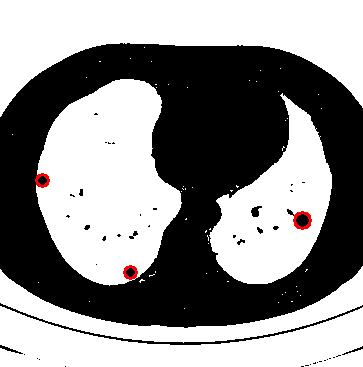

In [0]:
# 폐 노듈 검출

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def houghCircle():
    img1=cv2.imread('colab/lung_mask.png')
    img2=img1.copy()
    img2 = cv2.GaussianBlur(img2, (7,7), 0)
    imgray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    
    circles = cv2.HoughCircles(imgray,cv2.HOUGH_GRADIENT,1,10, 
                             param1=40, param2=10, minRadius=5, maxRadius=10)
    if circles is not None:
        circles = np.uint16(np.around(circles))

        for i in circles[0, :]:
            cv2.circle(img1, (i[0],i[1]),i[2],(0,0,255),2)
            
        cv2_imshow(img1)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
        
houghCircle()